 ### 1 .Import dependencies

In [1]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Data Collection

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### 3. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5573 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  7 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### 3.1 Removing Null Values

In [5]:
# Drop last 3 columns
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [6]:
df.rename(columns={"v1" : "Label" , "v2" : "Email"},inplace = True)

In [7]:
df.columns

Index(['Label', 'Email'], dtype='object')

In [8]:
# Conversion of label into binary form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df["Label"] = encoder.fit_transform(df["Label"])

In [10]:
df.head(10)

,Label,Email
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,2,FreeMsg Hey there darling it's been 3 week's n...
6,1,Even my brother is not like to speak with me. ...
7,1,As per your request 'Melle Melle (Oru Minnamin...
8,2,WINNER!! As a valued network customer you have...
9,2,Had your mobile 11 months or more? U R entitle...


#### 3.2 Removing Duplicate Values

In [11]:
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5170, 2)

### 4. EDA

In [15]:
df["Label"].value_counts()

Label
1    4516
2     653
0       1
Name: count, dtype: int64

#### 4.1 Analyzing the data

In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
df["Email"] = df["Email"].astype(str)
df["num_chars"] = df["Email"].apply(len)

In [18]:
df[["num_chars"]].describe()

,num_chars
count,5170.000000
mean,78.909478
std,58.179304
min,2.000000
25%,36.000000
50%,60.000000
75%,116.750000
max,910.000000


In [19]:
df.head()

,Label,Email,num_chars
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


#### 4.2 Ploting Histogram

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

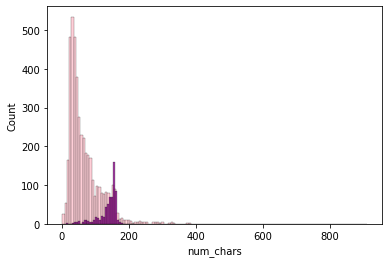

In [20]:
# Histogram for ham
sns.histplot(df[df["Label"] == 1]["num_chars"], color = "pink")

# Histogram for spam
sns.histplot(df[df["Label"] == 2]["num_chars"], color="purple")


#### 4.3 Plotting Heatmap

In [21]:
df1 = df[["Label","num_chars"]]

<AxesSubplot:>

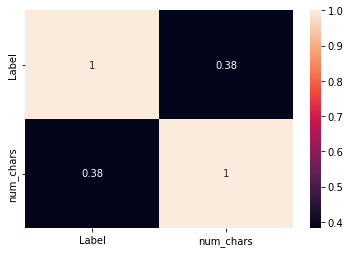

In [22]:
sns.heatmap(df1.corr(),annot=True)

### 5. Data Preprocessing

In [23]:
nltk.download("stopwords")
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
ps = PorterStemmer()

In [25]:
def transform_email(text):
    # Lower case
    text = text.lower()

    # Tokenization
    text = nltk.wordpunct_tokenize(text)

    # removing special characters
    list = []
    for i in text:
        if i.isalnum():
            list.append(i)

    # Removing stop words and punctuation
    text = list[:]
    list.clear()

    for i in text:
        if i not in (stopwords.words("english") or string.punctuation):
            list.append(i)

    # Stemming
    text = list[:]
    list.clear()

    for i in text:
        list.append(ps.stem(i))

    return " ".join(list)

In [26]:
transform_email(df["Email"][100])

'okay name ur price long legal wen pick u ave x am xx'

In [27]:
df["transformed_email"]  = df["Email"].apply(transform_email)

In [28]:
df.head()

,Label,Email,num_chars,transformed_email
0,1,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=1500, height= 1500)

In [30]:
spam_wc = wc.generate(df[df["Label"] == 2]["transformed_email"].str.cat(sep=" "))

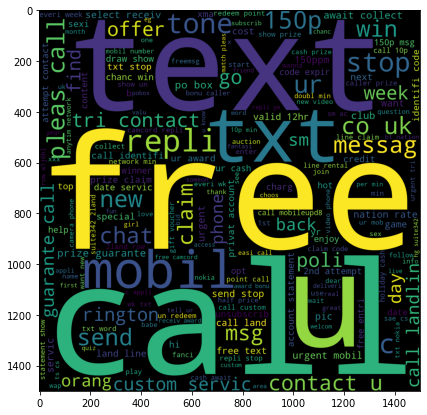

In [31]:
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)

In [32]:
ham_wc = wc.generate(df[df["Label"] == 1]["transformed_email"].str.cat(sep=" "))

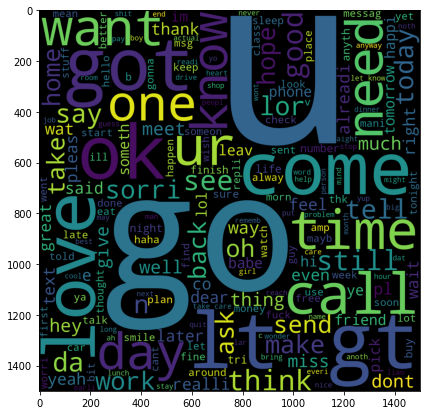

In [33]:
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)

### 6. Model Building

In [34]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [35]:
x = tfidf.fit_transform(df["transformed_email"]).toarray()

In [36]:
x.shape

(5170, 2000)

In [37]:
y = df["Label"].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [41]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [42]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8481624758220503
[[763 137]
 [ 20 114]]
0.9744572158365262


In [43]:

mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[900   0]
 [ 23 111]]
0.9750812567713976


In [44]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[900   0]
 [ 16 118]]
0.982532751091703


As precision score is high by using tfidf and BernoulliNB it is used for testing further

### 7. Model Improvement

In [45]:
# voting classifeir
bnb = BernoulliNB()
mnb = MultinomialNB()
from sklearn.ensemble import VotingClassifier

In [46]:
voting = VotingClassifier(estimators=[("bnb",bnb),("nb",mnb)],voting="soft")

In [47]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()), ('nb', MultinomialNB())],
                 voting='soft')

In [48]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.982532751091703


Different models performance

In [49]:
models = {
    "GNB" : gnb,
    "MNB" : mnb,
    "BNB" : bnb,
    "VC" : voting
}

In [50]:
accuracy_scores = []
precision_scores = []

for name,model in models.items():
    model.fit(x_train, y_train)
    y_pred1 = model.predict(x_test)
    Accuracy = accuracy_score(y_test,y_pred1)
    precision = precision_score(y_test,y_pred1)

    accuracy_scores.append(Accuracy)
    precision_scores.append(precision)

In [51]:
performace = pd.DataFrame({"Algoriths": models.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values("Accuracy",ascending=False)

In [52]:
performace

,Algoriths,Accuracy,Precision
2,BNB,0.984526,0.982533
3,VC,0.984526,0.982533
1,MNB,0.977756,0.975081
0,GNB,0.848162,0.974457


VotingClassifier has highest accuracy and is used for further analysis

### 8. Pipeline and Deploying

In [53]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(voting,open("model.pkl","wb"))